# Imports

In [1]:
print('Loading libraries')
start_time <- Sys.time()
suppressPackageStartupMessages({
    library(data.table)
    library(ggplot2)
    library(ggpubr)
    library(patchwork)
    library(plyr)
    library(dplyr)
    library(future)
    library(pheatmap)
    library(RColorBrewer)
    library(stringr)
    library(rstatix)
    library(readxl)
    library(tidyr)
    }
)
print('Library load finished')
print(Sys.time()-start_time)


hpc =  TRUE
work_desktop = FALSE
work_linux = TRUE
singularity = TRUE
prj =  "HCC-CBS-173-Hillman-BFerris-NRG-HN003-Vectra"
if (!hpc){
    if (work_desktop){
        if (work_linux){
            base = paste0('/mnt/d/OneDrive - University of Pittsburgh/Internal_Project_Data_2/' ,prj)
        }else{
            base =paste0('D:\\OneDrive - University of Pittsburgh\\Internal_Project_Data_2\\', prj)
        }
    }else{
        base = paste0('/home/brian/data/odrive/Internal_Project_Data_2/',prj)
    }
}else{
    if (singularity){
        base = '/mnt'
    }else{
        base = paste0('/ix/rbao/Projects/', prj)
    }
}
print(base)
results <- file.path(base,'results')
print(results)
fn <- 'cell_density_34_all_inc_tumor_stroma_20_percent_v1.csv'
df <- read.csv(file.path(results,fn))
head(df)


[1] "Loading libraries"
[1] "Library load finished"
Time difference of 1.34942 mins
[1] "/mnt"
[1] "/mnt/results"


,Sample.Name,study_id,total_roi,n_tumor_segments,n_stroma_segments,PDL1.panCK.tumor_percent,PDL1.panCK.stroma_percent,PDL1.panCK.all_percent,PDL1.panCKneg.CD3pos.tumor_percent,PDL1.panCKneg.CD3pos.stroma_percent,PDL1.panCKneg.CD3pos.all_percent,PDL1.panCKneg.CD3neg.tumor_percent,PDL1.panCKneg.CD3neg.stroma_percent,PDL1.panCKneg.CD3neg.all_percent,CD3.CD8.Tcell.tumor_percent,CD3.CD8.Tcell.stroma_percent,CD3.CD8.Tcell.all_percent,Treg.tumor_percent,Treg.stroma_percent,Treg.all_percent
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,RACTIH_Scan1.qptiff,RACTIH,12,12,12,1.581028,2.4818933,1.932385,0.002949678,0.01845274,0.008996204,0.4277034,2.1220649,1.0885406,0.020647749,0.009226369,0.01619317,0.000000000,0.004613184,0.001799241
2,RACTKE_Scan1.qptiff,RACTKE,285,285,285,68.519584,35.4576429,51.416619,0.049980291,1.07511932,0.580285409,1.1840614,12.9683078,7.2800601,0.055449832,2.010679038,1.06689123,0.092793596,3.922979994,2.074151626
3,RACTLH_Scan2.qptiff,RACTLH,59,59,59,8.792360,3.9117319,6.129775,0.000000000,0.02801540,0.015283563,0.3746256,2.2418837,1.3932923,0.003128397,0.319896799,0.17593870,0.004692596,0.138773968,0.077839544
4,RACTNY_Scan1.qptiff,RACTNY,27,27,27,3.737032,0.8999784,2.049500,0.004234597,0.02019182,0.013726247,0.3917002,0.7427706,0.6005233,0.406521279,1.400447105,0.99772659,0.175735761,0.346145525,0.277098615
5,RACTRF_Scan1.qptiff,RACTRF,10,10,10,13.805149,1.4236082,8.444917,0.058222280,0.14405559,0.095381342,0.2393583,0.7880688,0.4769067,0.226419977,1.559189899,0.80340438,2.083063786,5.363952207,3.503430060
6,RACTRU_Scan1.qptiff,RACTRU,38,38,38,23.019207,8.3016812,11.614162,0.036987134,0.47420639,0.375801253,1.4504240,7.0893089,5.8201625,2.079205305,1.963582790,1.98960600,0.198145359,1.952840251,1.557910260


# Check CD8 T cell percents across patients

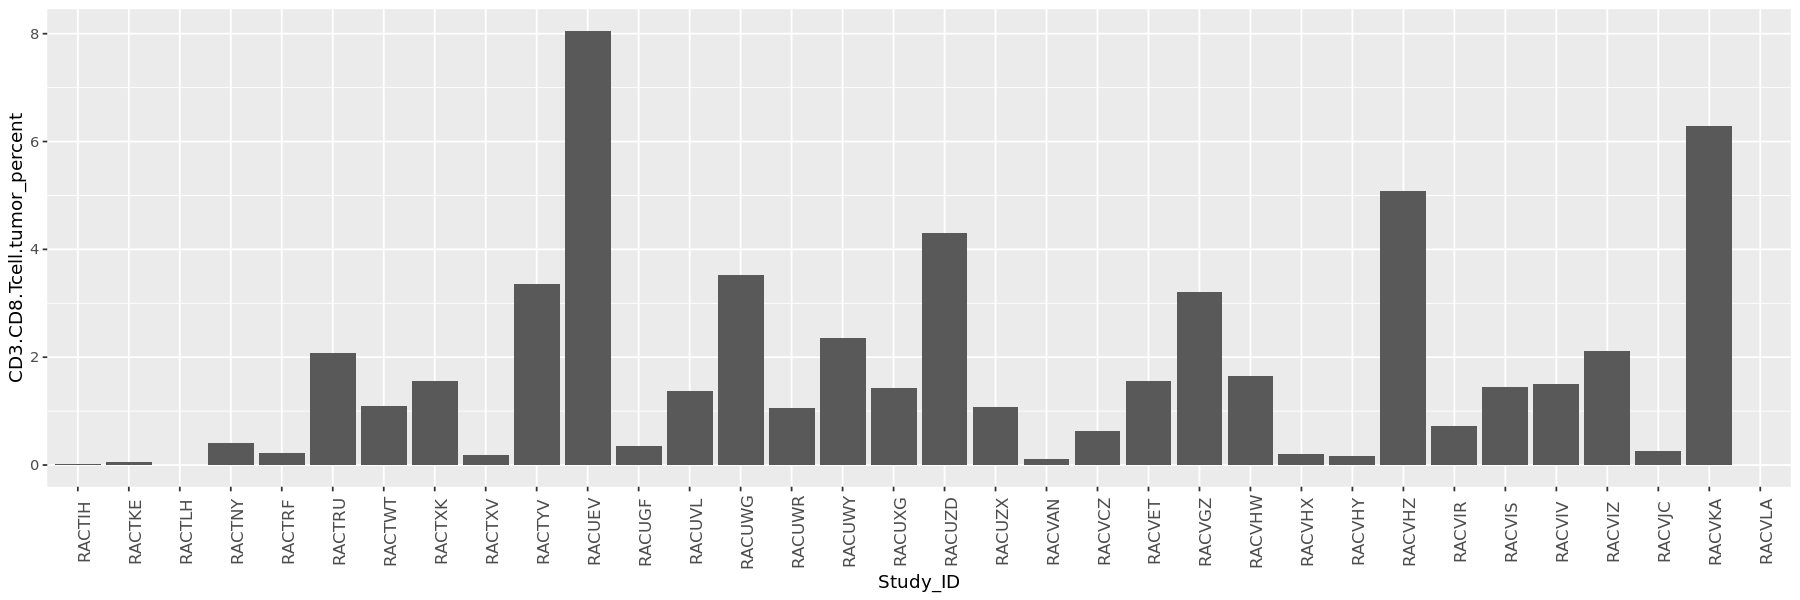

In [3]:
options(repr.plot.width=15,repr.plot.height=5)
d1 <- df
d1$Study_ID <- factor(d1$study_id,
                         levels=as.factor(sort(unique(df$study_id))))

ggplot(d1, aes(x=Study_ID,
                 y=CD3.CD8.Tcell.tumor_percent,
                    )) +
       geom_bar(stat='identity',
                position = position_dodge(width = 0.9)) + 
       theme(axis.text.x = element_text(angle = 90, size = 10))

# Density by path response

## CD3+ CD8+ PD1-negative T responder v. nonresponder

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.04735869,0.047,0.047,*,T-test


`geom_smooth()` using formula = 'y ~ x'


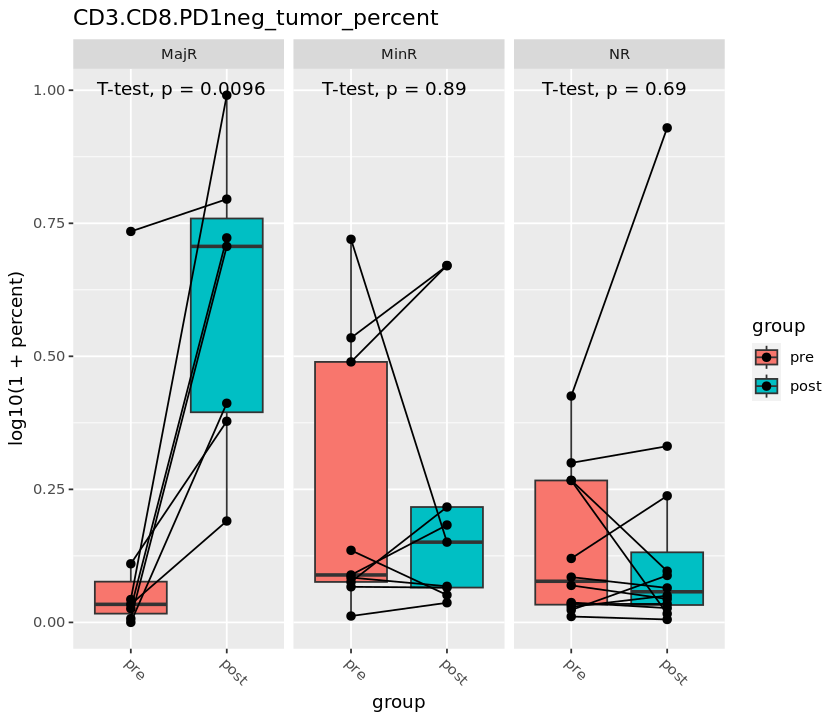

`geom_smooth()` using formula = 'y ~ x'


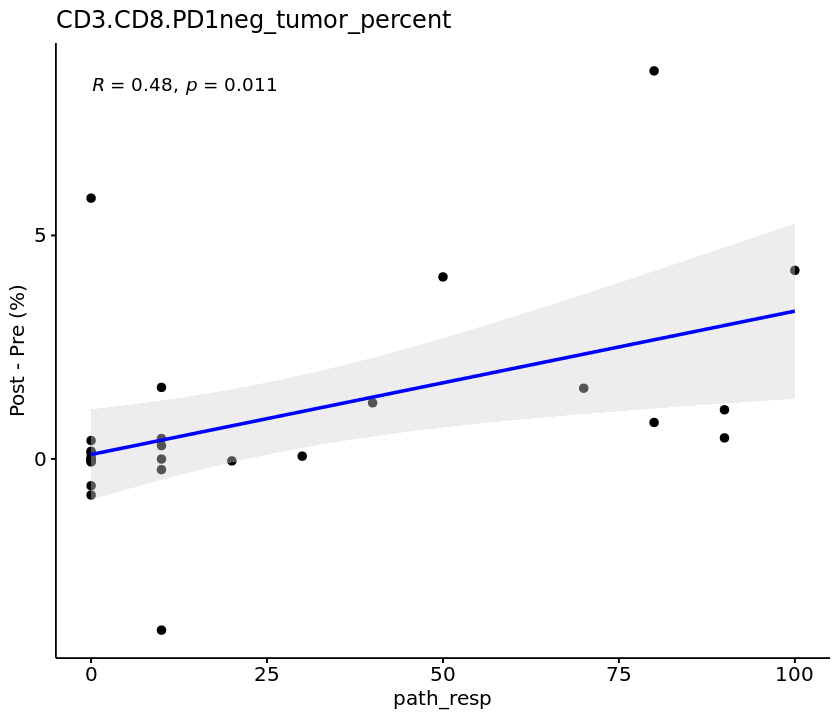

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.2597047,0.26,0.26,ns,T-test


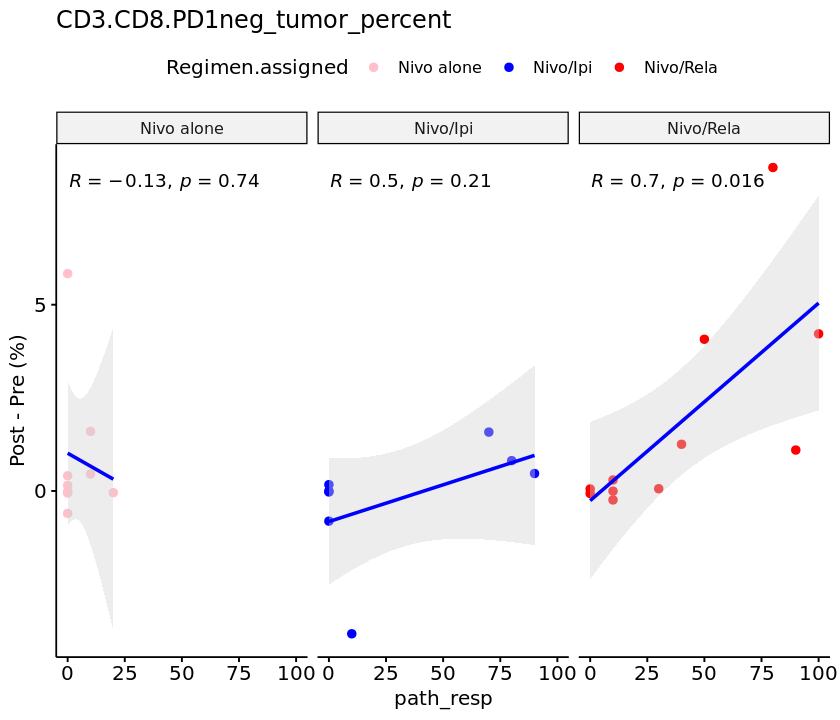

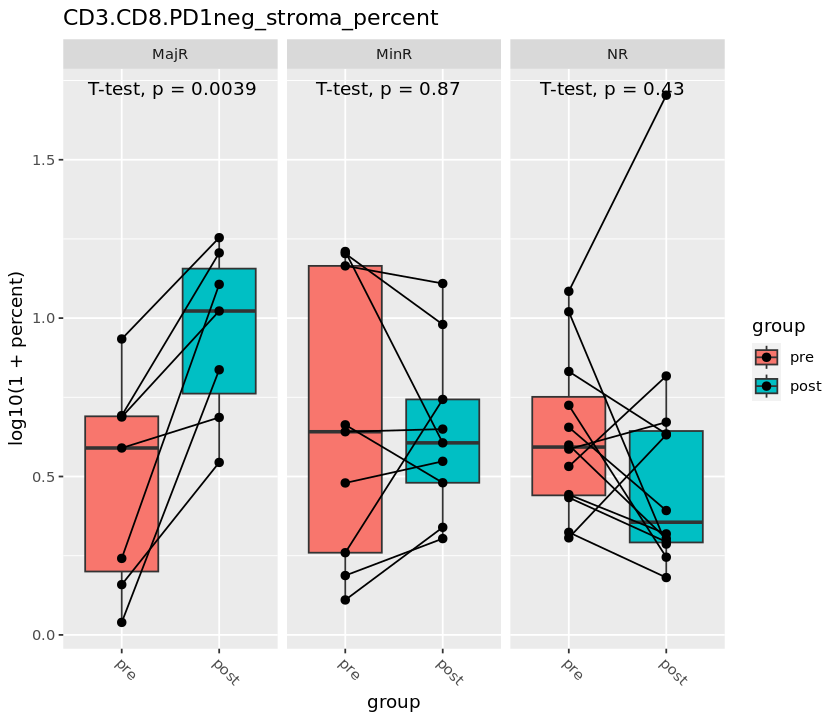

In [37]:
# fn <- 'clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent.csv'
fn <- 'clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent_v2.csv'
use.percents=c('CD3.CD8.PD1neg_tumor_percent','CD3.CD8.PD1neg_stroma_percent')
df_clin <- read.csv(file.path(results,fn))
use.df <- df_clin %>% filter(pt_id %in% paired_pt)

options(repr.plot.width=7,repr.plot.height=6)
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
# d1$percent <- d1$CD8_tumor_percent
d1$percent <- d1[,use.percents[1]]
# d1$any_resp <- as.numeric(d1$Path_response) < -30
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle(use.percents[1]) +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)

paired <- pivot_wider(d1[,c('Study_ID','group',
                        'Regimen.assigned',
                        'percent','Path_response')],
                      names_from="group", 
                values_from = "percent")
paired$diff <- paired$post - paired$pre
paired$path_resp <- as.numeric(paired$Path_response)*-1
p1 <- ggscatter(paired, x = "path_resp", y = "diff",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle(use.percents[1]) + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") #, label.x = 1.3, label.y = 1.5

p1 <- ggscatter(paired, x = "path_resp", y = "diff",
    color="Regimen.assigned",
    palette = c("Nivo/Rela" = "red", "Nivo/Ipi" = "blue", "Nivo alone" = "pink"),
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle(use.percents[1]) + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") + 
    facet_wrap(~Regimen.assigned) #, label.x = 1.3, label.y = 1.5



# ###### For t cell inclsuive:
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
# d1$percent <- d1$CD8_stroma_percent
d1$percent <- d1[,use.percents[2]]
d1$any_resp <- as.numeric(d1$Path_response) < -30
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle(use.percents[2]) +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)



## Loop and correct FDR

In [ ]:
df.counts <- read.csv(file.path(results,'cell_density_71_samples_all_inc_tumor_stroma_22_counts.csv'))
df.counts <- df.counts %>% filter(pt_id %in% paired_pt)
outliers <- c(27,28,33)
dim(df.counts)
df.counts$group <- factor(df.counts$time_point, levels=c('pre','post'))

In [9]:
head(df,n=1)

,tissue_id,pt_id,arm,time_point,CD8_CD3_tumor_percent,CD8_CD3_stroma_percent,CD8_CD3_all_percent,Treg_tumor_percent,Treg_stroma_percent,Treg_all_percent,PDL1_tumor_percent,PDL1_stroma_percent,PDL1_all_percent
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MISP0099Q001,2,B,post,0.7877549,0.4406308,0.7263326,0.9074139,1.020408,0.9274078,9.757192,4.475881,8.822685


In [78]:
use.groups = c('CD8_CD3_tumor_percent','CD8_CD3_stroma_percent',
               'Treg_tumor_percent','Treg_stroma_percent',
               'PDL1_tumor_percent','PDL1_stroma_percent',
               'CD8.Treg.tumor.ratio')
n_fdr = length(use.groups)
arms = c('A','B')
use.df <- df %>% filter(pt_id %in% paired_pt)
use.df$CD8.Treg.tumor.ratio <- log10( 1 + df.counts$CD8_CD3_tumor_counts /
                                          df.counts$Treg_tumor_counts)
use.df$CD8.Treg.stroma.ratio <- log10( 1 + df.counts$CD8_CD3_stroma_counts /
                                          df.counts$Treg_stroma_counts)

all.stats = data.frame(c())
for (cell.group in use.groups){
    d1 <- use.df
    d1$group <- factor(d1$time_point, levels=c('pre','post'))
    d1$percent <-d1[,cell.group]
    d1$log_percent <- log10(1+ d1$percent)
    for (cur.arm in arms){
        d2 <- d1 %>% filter(arm == cur.arm)
        # d2$diff <- d2[group == 'post','percent'] - d2[group=='pre','percent']
        stats<- compare_means(log_percent ~ group, 
                              data = d2, 
                              paired = TRUE,
                              method = "t.test")
        stats$.y. <- cell.group
        stats$arm <- cur.arm
        cdata <- plyr::ddply(d2, c("group", "arm"), summarise,
               N    = length(log_percent),
               mean = mean(log_percent),
               sd   = sd(log_percent),
               se   = sd / sqrt(N)
            )
        cdata$arm <-NULL
        stats <-cbind(stats,cdata %>%  tidyr::pivot_wider(names_from = group, values_from = c('N','mean','sd','se')))
        all.stats <- rbind(all.stats,stats)
        }
    
    } 
# for (cur.arm in arms){
#     idx = all.stats$arm == cur.arm
#     p.adj <- p.adjust(all.stats[idx,'p'], method="fdr")
#     all.stats[idx,'p.adj'] <- p.adj
# }
    
all.stats$p.adj <- p.adjust(all.stats$p, method="fdr")
all.stats$mean.diff <- all.stats$mean_post - all.stats$mean_pre
all.stats[,c('p.format','p.signif')]<-NULL
all.stats

.y.,group1,group2,p,p.adj,method,arm,N_pre,N_post,mean_pre,mean_post,sd_pre,sd_post,se_pre,se_post,mean.diff
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD8_CD3_tumor_percent,pre,post,0.3439955451,0.651628719,T-test,A,18,18,0.37147948,0.31384243,0.29333234,0.17726347,0.06913909,0.04178140,-0.057637045
CD8_CD3_tumor_percent,pre,post,0.4654490847,0.651628719,T-test,B,15,15,0.31451978,0.25828845,0.23745786,0.17083396,0.06131136,0.04410914,-0.056231325
CD8_CD3_stroma_percent,pre,post,0.0508182537,0.142291110,T-test,A,18,18,0.48326926,0.32980651,0.31653157,0.21660763,0.07460721,0.05105491,-0.153462748
CD8_CD3_stroma_percent,pre,post,0.0093218606,0.043502016,T-test,B,15,15,0.55113147,0.28169688,0.32304512,0.14573772,0.08340989,0.03762932,-0.269434592
Treg_tumor_percent,pre,post,0.5212860378,0.663454957,T-test,A,18,18,0.41365762,0.45529880,0.18376226,0.17133369,0.04331318,0.04038374,0.041641185
Treg_tumor_percent,pre,post,0.4301453745,0.651628719,T-test,B,15,15,0.34864347,0.31168414,0.23294790,0.16557340,0.06014689,0.04275087,-0.036959335
Treg_stroma_percent,pre,post,0.0626108450,0.146091972,T-test,A,18,18,0.60974592,0.47069203,0.25170765,0.19879728,0.05932806,0.04685697,-0.139053887
Treg_stroma_percent,pre,post,0.0047597845,0.033318491,T-test,B,15,15,0.55847844,0.33969506,0.28191287,0.18817386,0.07278959,0.04858628,-0.218783385
PDL1_tumor_percent,pre,post,0.0001514462,0.002120246,T-test,A,18,18,0.63656968,1.06958164,0.52059023,0.39044877,0.12270429,0.09202966,0.433011959
